In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [13]:
x_train.shape

(50000, 32, 32, 3)

(<matplotlib.image.AxesImage at 0x17a7ad34250>, array([6], dtype=uint8))

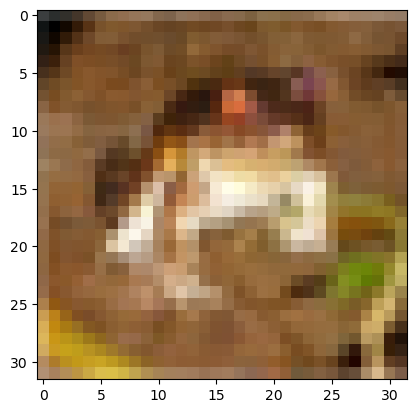

In [69]:
plt.imshow(x_train[0]),y_train[0]

In [25]:
x_train[0].max(), x_train[79].max()

(255, 255)

In [27]:
x_train=x_train/255
x_test=x_test/255
x_train.shape

(50000, 32, 32, 3)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model=Sequential()

In [33]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

Sparse Categorical Crossentropy (sparse_categorical_crossentropy)
Expected Label Format:

The target labels are provided as integer class labels (not one-hot encoded).
Each label is simply an integer that represents the class index.
Example:

For a problem with 3 classes, the labels might look like this:
Class 0: 0
Class 1: 1
Class 2: 2
Use Case:

Use this when your labels are provided as integers, making it more memory-efficient as you do not need to convert them to one-hot encoding.

In [40]:
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')) ### No input shape needed here
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))  ##Multiclass clasification problem

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [48]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=15,callbacks=[early_stop],workers=5,use_multiprocessing=True)

Epoch 1/15
1563/1563 [==============================] - 87s 53ms/step - loss: 1.5386 - accuracy: 0.4329 - val_loss: 1.3184 - val_accuracy: 0.5224
Epoch 2/15
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1851 - accuracy: 0.5750 - val_loss: 1.1808 - val_accuracy: 0.5779
Epoch 3/15
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0210 - accuracy: 0.6353 - val_loss: 0.9820 - val_accuracy: 0.6520
Epoch 4/15
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9142 - accuracy: 0.6745 - val_loss: 0.9310 - val_accuracy: 0.6713
Epoch 5/15
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8469 - accuracy: 0.6996 - val_loss: 0.8889 - val_accuracy: 0.6914
Epoch 6/15
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7874 - accuracy: 0.7212 - val_loss: 0.8702 - val_accuracy: 0.7007
Epoch 7/15
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7377 - accuracy: 0.7395 - val_loss: 0.8731 -

In [50]:
df_loss=pd.DataFrame(model.history.history)

In [52]:
df_loss

,loss,accuracy,val_loss,val_accuracy
0,1.538643,0.43292,1.318400,0.5224
1,1.185123,0.57504,1.180827,0.5779
2,1.021003,0.63534,0.982020,0.6520
3,0.914237,0.67446,0.931010,0.6713
4,0.846902,0.69964,0.888897,0.6914
5,0.787440,0.72118,0.870188,0.7007
6,0.737700,0.73954,0.873134,0.6980
7,0.703321,0.75220,0.858128,0.7086
8,0.665731,0.76368,0.901780,0.7011
9,0.639190,0.77228,0.874548,0.7029


<Axes: >

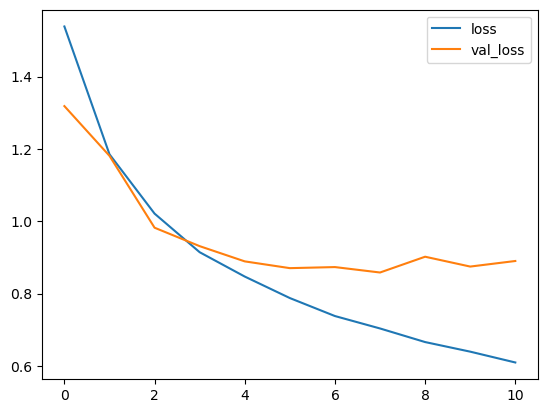

In [56]:
df_loss[['loss','val_loss']].plot()

<Axes: >

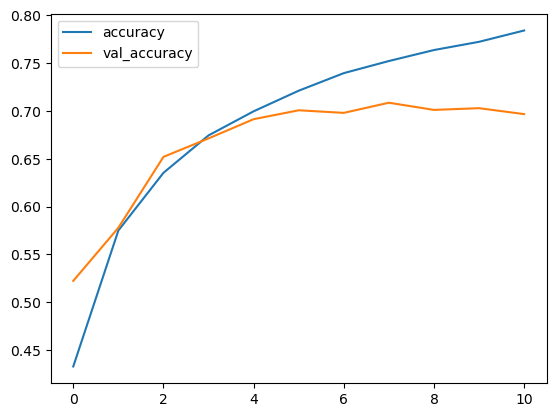

In [58]:
df_loss[['accuracy','val_accuracy']].plot()

In [60]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.8900 - accuracy: 0.6967


[0.8899508714675903, 0.6966999769210815]

In [62]:
prediction=model.predict(x_test)

313/313 [==============================] - 7s 20ms/step


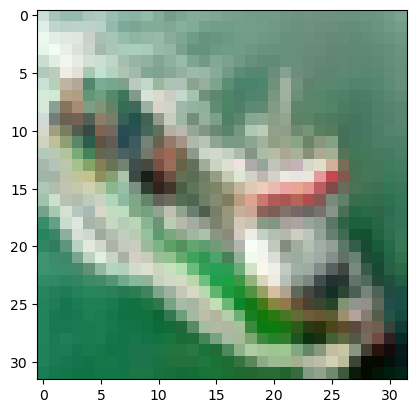

In [77]:
plt.imshow(x_test[15])

In [79]:
prediction[15]

array([1.55636882e-02, 1.12835864e-04, 2.59155091e-02, 3.80424852e-03,
       5.49080968e-03, 1.03220379e-03, 7.10233906e-03, 1.06818006e-04,
       9.40679252e-01, 1.92370178e-04], dtype=float32)

In [81]:
predicted_classes = np.argmax(prediction, axis=1)

In [83]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [85]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.87      0.81      0.84      1000
           2       0.57      0.64      0.61      1000
           3       0.44      0.66      0.53      1000
           4       0.67      0.59      0.63      1000
           5       0.68      0.52      0.59      1000
           6       0.91      0.60      0.73      1000
           7       0.73      0.76      0.75      1000
           8       0.79      0.83      0.81      1000
           9       0.86      0.74      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000



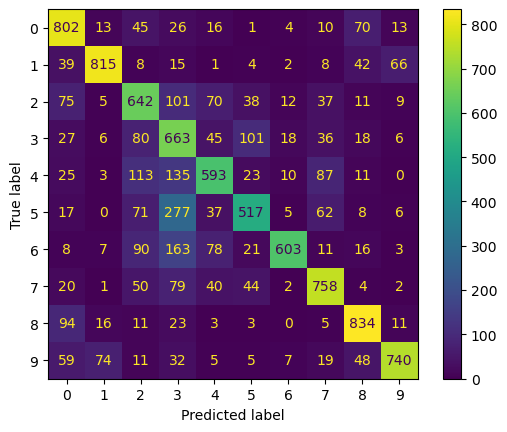

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test,predicted_classes)